# Springboard Data Science Boot Camp - Data Storytelling Project: Adult Income

## Objectives:

- Briefly explore the data and perform what cleaning is necessary.
    - look for NaN, Datatypes, and drop/impute data as seems pertinent
- More thoroughly explore the data and formulate a story around it.
    - histograms
    - barcharts
    - heatmaps
    - boxplots
    - scatterplots
    - pairplot
    - etc.
    - Question the data:
        - Can I count something interesting?
        - Can I find trends (e.g. high, low, increasing, decreasing, anomalies)?
        - Can I make a bar plot or a histogram?
        - Can I compare two related quantities?
        - Can I make a scatterplot?
        - Can I make a time-series plot?
        - Looking at the plots, what are some insights I can make?
        - Can I see any correlations?
        - Is there a hypothesis I can - and should - investigate further?
        - What other questions are the insights leading me to ask?
- Present the data for a non-technical audience.
    - Select what charts best explain the data story and make them as professionally presentable (As clear as possible)
    - ensure that each graphic flows naturally within in the story and is clear enough such that anyone could understand it.
    - ensure rubric standards and project objectives are met prior to submission.

### 1. Import modules and data and briefly explore/clean it ###

In [106]:
# Import python modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Add more modules here as necessary
from plotly import graph_objects as go


In [107]:
# Import the data
df = pd.read_csv('./Data/adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [109]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


__Initial Impressions:__
- There are no NaN values!
- however some columns require clarification: "fnlwgt", "educational-num", "capital-gain", "capital-loss", "income"
    - **fnlwgt** is the final weight assigned by a machine learning algorithm and perhaps should be dropped for our purposes
    - **educational-num** is the number of years of education (not necessarily the highest degree of education achieved)
    - **capital-gain/loss** are measure of gain or loss of capital. I assume this means investments in the stock market.
    - **income** is the assumed earned income as calculated by a Machine learning model and only indicates above or belo 50k.
        - Since it's not very clear, this column too should likely be dropped for our purposes. however it would be interesting to see how a machine learning model might predict these values.

Before exploring much further I will drop the **fnlwgt, capital-gain, and capital-loss** columns since the majority of data appears to be filled with 0's (in the capital-gain/loss columns) to account for a lack of data to that end and while it could be a strong indicator of ones' income, there's just not enough data provided there to justify it's use in our exploration.  as for fnlwgt this is a pre-assigned weight which I'm not sure whether I agree with it or not and it is a sum calcuation by some other entities work and so is not a core piece of data. 

In [110]:
# drop the "fnlwgt", "capital-gain", "capital-loss" columns from df
df.drop(columns=["fnlwgt", "capital-gain", "capital-loss"], inplace=True)
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


There **?** in the workclass and occupation columns.  I assume this to mean that the entity represented in the data doesn't have work at that point in time.  If we were pursuing data involving employment rates, this would be a value worth retaining in the dataset as it stands after validating whether or not the ? means what I think it means, these rows should be dropped.

In [111]:
# find all rows which contain a ? in either the workclass or the occupation columns
df[df['workclass'] == "?"]

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K
6,29,?,HS-grad,9,Never-married,?,Unmarried,Black,Male,40,United-States,<=50K
13,58,?,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,35,United-States,<=50K
22,72,?,7th-8th,4,Divorced,?,Not-in-family,White,Female,6,United-States,<=50K
35,65,?,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,55,United-States,>50K
48812,30,?,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,99,United-States,<=50K
48820,71,?,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,10,United-States,>50K
48822,41,?,HS-grad,9,Separated,?,Not-in-family,Black,Female,32,United-States,<=50K


In [112]:
df[df['occupation'] == "?"]

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K
6,29,?,HS-grad,9,Never-married,?,Unmarried,Black,Male,40,United-States,<=50K
13,58,?,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,35,United-States,<=50K
22,72,?,7th-8th,4,Divorced,?,Not-in-family,White,Female,6,United-States,<=50K
35,65,?,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,55,United-States,>50K
48812,30,?,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,99,United-States,<=50K
48820,71,?,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,10,United-States,>50K
48822,41,?,HS-grad,9,Separated,?,Not-in-family,Black,Female,32,United-States,<=50K


After taking a look at specifically the **?** values in workcalss and occupation columns, It is clear that this also represents unprovided information. so rather than dropping it I will simply replace the '?' with the mean value(s) of their respective columns

In [113]:
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [114]:
df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [115]:
# replace '?' with 'not-available'
# convert all '?' to NaN in 'occupation' column and replace '?' with 'Private' in 'workclass' column
df['workclass'].replace('?', 'Private', inplace=True)
df['occupation'].replace('?', np.NaN, inplace=True)

# proportionally fill NaN in 'occupation with 'Prof-specialty', 'Craft-repair', 'Exec-managerial'
df['occupation'] = df['occupation'].fillna(pd.Series(np.random.choice(['Prof-specialty', 'Craft-repair', 'Exec-managerial'], 
                                                      p=[.335, .335, .33], size=len(df))))

In [116]:
df['workclass'].value_counts()

workclass
Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [117]:
df['occupation'].value_counts()

occupation
Prof-specialty       7103
Exec-managerial      7064
Craft-repair         7012
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [118]:
# Let's also do a value counts in the categorical columns: 'workclass', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender' & 'native-country'
# so as to determine whether it would be worth it to convert these categorical not object columns in the dataframe and to see if it would be worth it to visualize these into barcharts.
cols_list = ['workclass', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

for col in cols_list:
    print("==:==:==:==:==:==:==:==:==:==:==:==")
    print(df[col].value_counts())

==:==:==:==:==:==:==:==:==:==:==:==
workclass
Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
==:==:==:==:==:==:==:==:==:==:==:==
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64
==:==:==:==:==:==:==:==:==:==:==:==
educational-num
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: count, dtype: int64
==:==:==:==:==:==:==:==:==

In [119]:
# We discovered a '?' in the native-country column! we should replace that with the overwhelming majority of 'United-States'
df['native-country'].replace('?', 'United-States', inplace=True)

Based upon what was found, 'native-country', would likely be too large to visualize but still would be insightful to the income of individuals. Enough data cleaning let's explore the data more visually!

### 2. Explore the data and formulate a story around it. ###

In [120]:
# let's print the head of 'df' so as to have a full list of data to work with
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,30,United-States,<=50K


In [121]:
df['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

Let's create a pair of sub dataframes from the main set which one which contains only the above 50k and the other below.

In [122]:
df_above50k = df[df['income'] == '>50K']

pd.DataFrame(df_above50k)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
7,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,32,United-States,>50K
10,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
14,48,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,48,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48820,71,Private,Doctorate,16,Married-civ-spouse,Craft-repair,Husband,White,Male,10,United-States,>50K
48826,39,Local-gov,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,20,United-States,>50K
48835,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K


In [123]:
df_below50k = df[df['income'] == '<=50K']

pd.DataFrame(df_below50k)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,30,United-States,<=50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K
6,29,Private,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48834,32,Private,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,11,Taiwan,<=50K
48836,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K


First I'd like to take take a look a what the ratio of men to women in the full sample set and then I'd like to see if that ratio is consistent within the above and below 50k subsets.

In [124]:
print("----------Full Data Set-----------")
print(df['gender'].value_counts(normalize=True))
print("----------------------------------\n")
print("--------Above 50k Data Set--------")
print(df_above50k['gender'].value_counts(normalize=True))
print("----------------------------------\n")
print("--------Below 50k Data Set--------")
print(df_below50k['gender'].value_counts(normalize=True))
print("----------------------------------")

----------Full Data Set-----------
gender
Male      0.668482
Female    0.331518
Name: proportion, dtype: float64
----------------------------------

--------Above 50k Data Set--------
gender
Male      0.848635
Female    0.151365
Name: proportion, dtype: float64
----------------------------------

--------Below 50k Data Set--------
gender
Male      0.611815
Female    0.388185
Name: proportion, dtype: float64
----------------------------------


We have a 2 to 1 ratio between men and women which would mean, assuming no other factors are at play, we should see approximately the same ratio between the above/below 50k subsets.  Unfortunately this isn't what we see.  In the above 50k data set we see the men go from 67% to 85%, A 27% increase!  we likewise see the expected drop in women from 33% to 15% which for women is a 55% drop in this data set!  However it is necessary to put this into perspective. We are in this instance treating our full sample set as a whole population.  An absurd assertion as we know there isn't world population of 48,842 people, but since we are exploring the ratio of men to women in this specific data set, due to the 2 to 1 ratio of men to women in the set, any motion in either direction is going reflect more greatly in the ratio of women, as one might guess at approx twice as much, so it stands to reason a 27% increase in men will naturally result in a 55% decrease in women as 27 X 2 is 54, very close to 55!

Continuing on to the Below 50k data set, we see 67% drop to 61% in the men, and an increase from 33% to 39% in women; a 9% decrease in men and an %18 increase in women.

This quick look is indicative that generally men tend to earn above 50k then women do in this dataset, the reasons of which we hope to explore further.

Let's now examine the life choices which are availabel to us in this dataset, first examining education, a commonly cited factor in individual income statistics.

In [125]:
pd.DataFrame(df_above50k.groupby('education')[['relationship', 'gender', 'education']].value_counts()).reset_index()

,education,relationship,gender,count
0,10th,Husband,Male,75
1,10th,Unmarried,Male,3
2,10th,Wife,Female,3
3,10th,Not-in-family,Male,3
4,10th,Own-child,Male,2
...,...,...,...,...
106,Some-college,Own-child,Male,18
107,Some-college,Unmarried,Female,18
108,Some-college,Own-child,Female,11
109,Some-college,Other-relative,Male,6


In [126]:
pd.DataFrame(df_below50k.groupby('education')[['relationship', 'gender', 'education']].value_counts()).reset_index()


,education,relationship,gender,count
0,10th,Husband,Male,396
1,10th,Own-child,Male,194
2,10th,Not-in-family,Male,176
3,10th,Unmarried,Female,138
4,10th,Own-child,Female,130
...,...,...,...,...
157,Some-college,Unmarried,Female,911
158,Some-college,Wife,Female,267
159,Some-college,Unmarried,Male,196
160,Some-college,Other-relative,Female,152


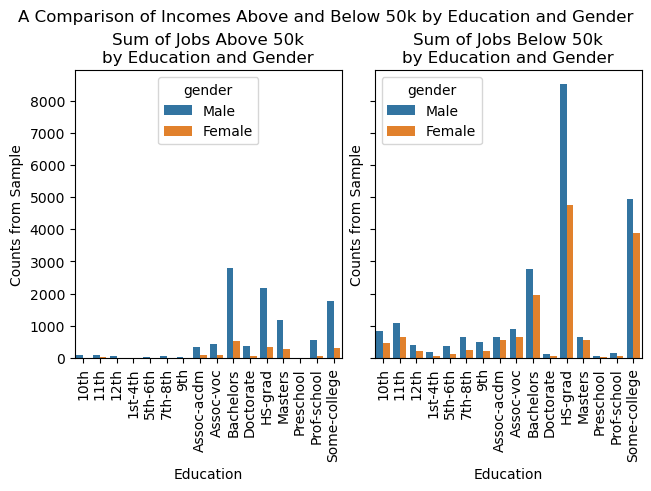

In [127]:
fig, (ax1, ax2) = plt.subplots(1,2, constrained_layout=True, sharey=True)
fig.suptitle('A Comparison of Incomes Above and Below 50k by Education and Gender')


sns.barplot(data=pd.DataFrame(df_above50k.groupby('education')[['gender', 'education']].value_counts()).reset_index(), 
            x='education', 
            y='count', 
            hue='gender',
            errorbar=('ci', False),
            ax=ax1)
ax1.set_title('Sum of Jobs Above 50k\nby Education and Gender')
ax1.set_xlabel('Education')
ax1.set_ylabel('Counts from Sample')
ax1.tick_params(axis='x', labelrotation=90)

sns.barplot(data=pd.DataFrame(df_below50k.groupby('education')[['gender', 'education']].value_counts()).reset_index(), 
            x='education', 
            y='count', 
            hue='gender',
            errorbar=('ci', False),
            ax=ax2)
ax2.set_title('Sum of Jobs Below 50k\nby Education and Gender')
ax2.set_xlabel('Education')
ax2.set_ylabel('Counts from Sample')
ax2.tick_params(axis='x', labelrotation=90)

plt.show()

So this is an interesting result. We aren't surprised so to see the greater ratio of men to women from  our previous analysis, but what we see here, is massive popuation difference between those who earn above 50k and those who do not. let's to a quick bar chart showing the difference between the two income ranges specifically.

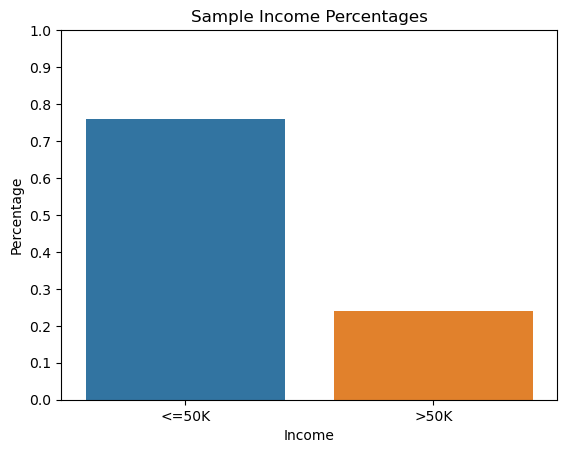

In [128]:
ax = sns.barplot(pd.DataFrame(df['income'].value_counts(normalize=True)).reset_index(),
            x='income', 
            y='proportion',
            errorbar=('ci', False))
plt.ylabel('Percentage')
plt.xlabel('Income')
plt.title('Sample Income Percentages')
ax.set_yticks(np.arange(0.0, 1.1, 0.1))
plt.show()

Unfortunately, the overwelming majority of people are earning below 50K, by approximately 3 to 1. Given the disparate degree between incomes I would like to look at the odds that ones' education will take them from below 50k to above.

In [129]:
# Subset the main data set into two Male and Female subsets.
df_male_subset = df[df['gender'] == 'Male']
df_female_subset = df[df['gender'] == 'Female']

In [130]:
df_male_subset.groupby('education')[['income', 'gender', 'education']].value_counts(normalize=True)

education     income  gender
10th          <=50K   Male      0.910944
              >50K    Male      0.089056
11th          <=50K   Male      0.930293
              >50K    Male      0.069707
12th          <=50K   Male      0.901345
              >50K    Male      0.098655
1st-4th       <=50K   Male      0.956989
              >50K    Male      0.043011
5th-6th       <=50K   Male      0.939791
              >50K    Male      0.060209
7th-8th       <=50K   Male      0.914804
              >50K    Male      0.085196
9th           <=50K   Male      0.932836
              >50K    Male      0.067164
Assoc-acdm    <=50K   Male      0.664271
              >50K    Male      0.335729
Assoc-voc     <=50K   Male      0.676714
              >50K    Male      0.323286
Bachelors     >50K    Male      0.503244
              <=50K   Male      0.496756
Doctorate     >50K    Male      0.762994
              <=50K   Male      0.237006
HS-grad       <=50K   Male      0.796669
              >50K    Male  

In [131]:
def order(df, key='income', values=['<=50K', '>50K']):
    df1 = df[df[key] == values[1]]
    df2 = df[df[key] == values[0]]
    df = pd.concat([df1.sort_values('proportion'), df2.sort_values('proportion', ascending=False)], ignore_index=True).reset_index()
    return df

In [132]:
df_male_normalized = pd.DataFrame(df_male_subset.groupby('education')[['income', 'gender', 'education']].value_counts(normalize=True)).reset_index()
df_female_normalized = pd.DataFrame(df_female_subset.groupby('education')[['gender', 'education', 'income']].value_counts(normalize=True)).reset_index()



In [133]:
# Due to the normalization the df_female_normalized dropped the two 0.0 proportions for '1st-4th' & 'Preschool'
# education values and we need to put them back.
pre_first_fourth = pd.DataFrame({'education': ['Preschool', '1st-4th'],
                    'gender': ['Female', 'Female'],
                    'income': ['>50K', '>50K'],
                    'proportion': [0.000000, 0.000000]})

df_female_normalized = pd.concat([df_female_normalized, pre_first_fourth], ignore_index=True)

df_female_normalized.reset_index(inplace=True)

In [136]:
df_female_normalized.drop(columns=['index'])
df_female_normalized

,index,education,gender,income,proportion
0,0,10th,Female,<=50K,0.991247
1,1,10th,Female,>50K,0.008753
2,2,11th,Female,<=50K,0.983077
3,3,11th,Female,>50K,0.016923
4,4,12th,Female,<=50K,0.981043
5,5,12th,Female,>50K,0.018957
6,6,1st-4th,Female,<=50K,1.000000
7,7,5th-6th,Female,<=50K,0.968504
8,8,5th-6th,Female,>50K,0.031496
9,9,7th-8th,Female,<=50K,0.995816


In [137]:
df_male_normalized = order(df_male_normalized)#.set_index('education')

In [138]:
df_female_normalized = order(df_female_normalized)#.set_index('education')

In [139]:
fig = go.Figure(
    data=[
        go.Bar(
            name="Male Income Over 50K",
            x=df_male_normalized["education"],
            y=df_male_normalized[df_male_normalized['income'] == '>50K']['proportion'],
            offsetgroup=0,
        ),
        go.Bar(
            name="Male Income At or Under 50K",
            x=df_male_normalized["education"],
            y=df_male_normalized[df_male_normalized['income'] == '<=50K']['proportion'],
            offsetgroup=0,
            base=df_male_normalized[df_male_normalized['income'] == '>50K']['proportion']
        ),
        go.Bar(
            name="Female Income Over 50K",
            x=df_female_normalized["education"],
            y=df_female_normalized[df_female_normalized['income'] == '>50K']['proportion'],
            offsetgroup=1,
        ),
        go.Bar(
            name="Female Income At or Under 50K",
            x=df_female_normalized["education"],
            y=df_female_normalized[df_female_normalized['income'] == '<=50K']['proportion'],
            offsetgroup=1,
            base=df_female_normalized[df_female_normalized['income'] == '>50K']['proportion'],
        )
    ],
    layout=go.Layout(
        title="Percent Success Rate by Education",
        yaxis_title="%"
    )
)
fig.show()
